模型的准确率: 90.04%


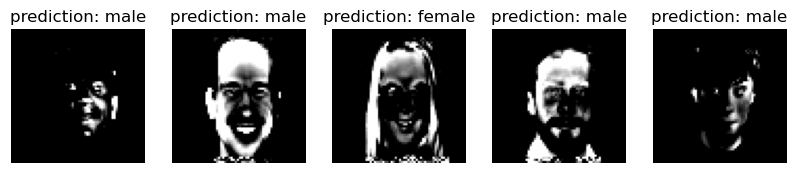

In [57]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage.transform import resize

# 假设图片数据存储在两个文件夹中，一个是'./data/male'，另一个是'./data/female'
# 每个文件夹中的图像是该性别的样本

def load_images_from_folder(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, img_size)  # 重设图像尺寸
            img = img.flatten()  # 将图片展平为一维向量
            images.append(img)
            labels.append(label)
    return images, labels

# 加载数据
male_images, male_labels = load_images_from_folder('D:/python_data/male', 1)
female_images, female_labels = load_images_from_folder('D:/python_data/female', 0)

# 合并数据
X = np.array(male_images + female_images)
y = np.array(male_labels + female_labels)

# 数据集划分：80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 可选：使用PCA降维提高训练速度和准确性
#pca = PCA(n_components=50)  # 降至50维
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

# 创建并训练SVM模型
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# 预测并评估模型
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的准确率: {accuracy * 100:.2f}%")

# 可视化一些测试结果
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    X_test[i] = np.clip(X_test[i], 0, 1)  # 保证图像数据在 [0, 1] 范围内
    plt.imshow(X_test[i].reshape(64, 64, 3))  # 重新调整图像为64x64
    plt.title(f"prediction: {'male' if y_pred[i] == 1 else 'female'}")
    plt.axis('off')
plt.show()

